# Lead Score Assignment

## Data Understanding

In [1]:
# importing all the libraries that are required for the case study
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# taking a look at the data and columns
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# printing names of the columns in data
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [4]:
# shape of the data
df.shape

(9240, 37)

In [5]:
# datatype and no of not null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## Data cleaning

#### Taking a look at the number of null values in each column

In [6]:
#sorting the columns with null values in descending order
df.isna().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [7]:
df.describe()
#Need to change the dtype of Lead Number, Converted, 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Changing datatype of columns from integer to object as they are categorical columns

In [8]:
df[['Lead Number','Converted']] = df[['Lead Number','Converted']].astype('object')

In [9]:
df.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,3.445238,487.698268,2.362820,14.306252,16.344883
std,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,7.000000,11.000000
25%,1.000000,12.000000,1.000000,14.000000,15.000000
50%,3.000000,248.000000,2.000000,14.000000,16.000000
75%,5.000000,936.000000,3.000000,15.000000,18.000000
max,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Extracting list of categorical columns

In [10]:
# Categorical columns
C = list(set(df.columns)-set(df.describe().columns))
C.remove('Lead Number')
C.remove('Prospect ID')
C

['X Education Forums',
 'Lead Profile',
 'Last Notable Activity',
 'Country',
 'Do Not Email',
 'Asymmetrique Profile Index',
 'Tags',
 'Lead Source',
 'Get updates on DM Content',
 'Receive More Updates About Our Courses',
 'How did you hear about X Education',
 'Converted',
 'What matters most to you in choosing a course',
 'What is your current occupation',
 'Digital Advertisement',
 'Lead Origin',
 'City',
 'Through Recommendations',
 'Asymmetrique Activity Index',
 'Newspaper Article',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Activity',
 'Magazine',
 'Update me on Supply Chain Content',
 'Specialization',
 'Newspaper',
 'Do Not Call',
 'Lead Quality',
 'Search']

#### Changing select to null in some categorical columns

There are some columns which have select as value. select indicates that the user has not selected any option so we need to replace that values as null

In [11]:
def select_convertor(col_name):
    df[col_name] = df[col_name].apply(lambda x: np.nan if x == 'Select' else x)

In [12]:
# columns having select values
for col in ['Specialization', 'How did you hear about X Education','Lead Profile', 'City']:
    select_convertor(col)

#### Calculating % of missing values in each column of data

In [13]:
#df.isna().sum().sort_values(ascending=False)
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### Analysing the different types of values in each categorical columns along with their count

Checking different type of values in each categorical column along with their count will help us to find the skewness in each columns and types of values stored in each column

In [14]:
for col in C:
    print("'*********",col,"*********'")
    print(df[col].value_counts())
    print()

'********* X Education Forums *********'
No     9239
Yes       1
Name: X Education Forums, dtype: int64

'********* Lead Profile *********'
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

'********* Last Notable Activity *********'
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Form Submitted on Website          1
Email Received                     1
Name: Last

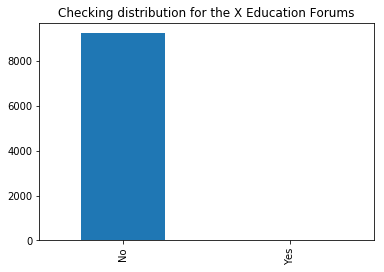

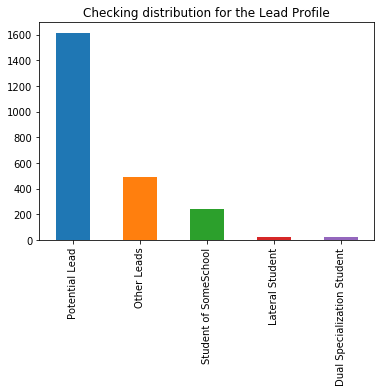

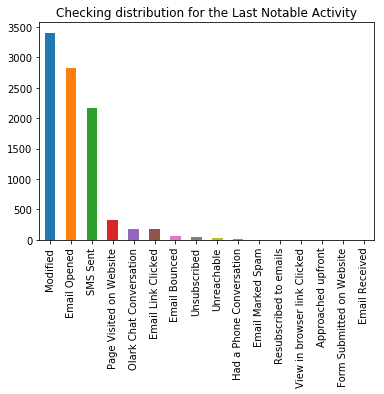

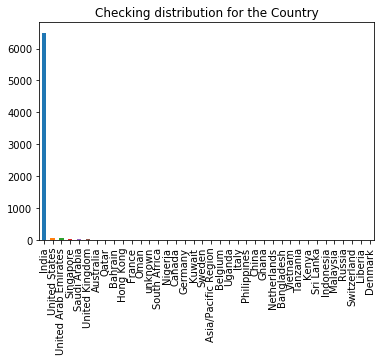

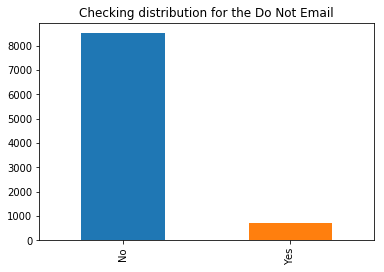

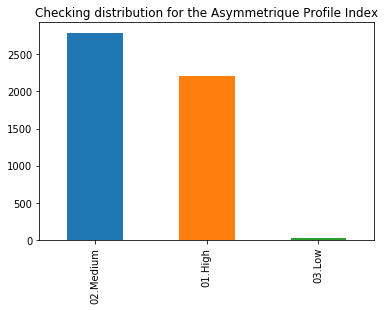

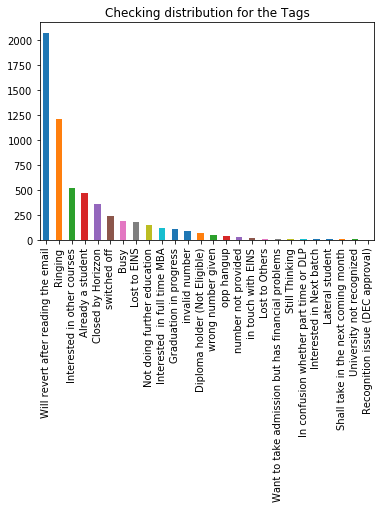

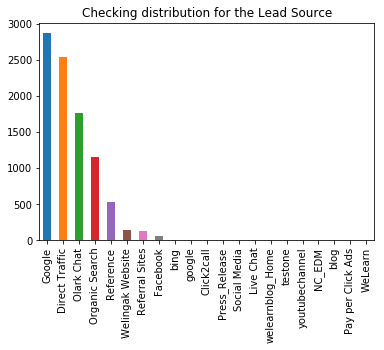

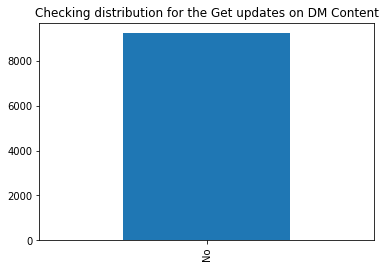

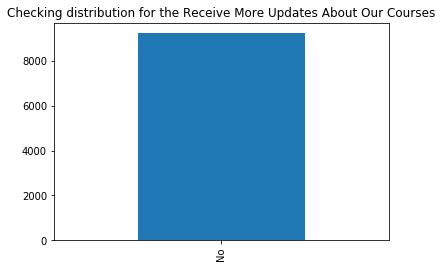

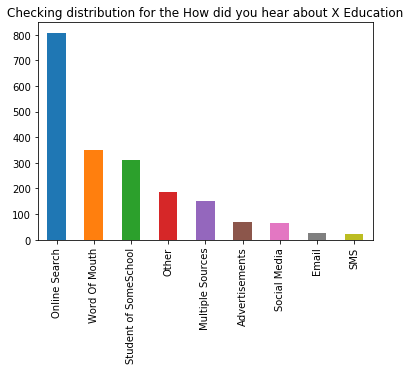

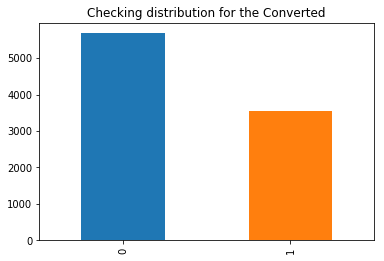

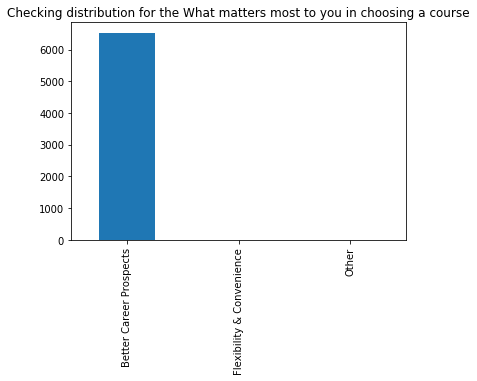

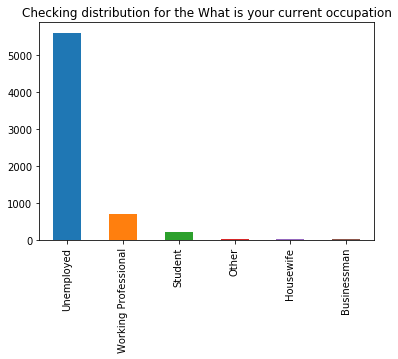

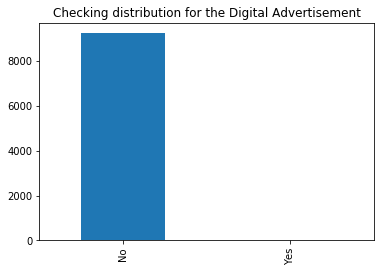

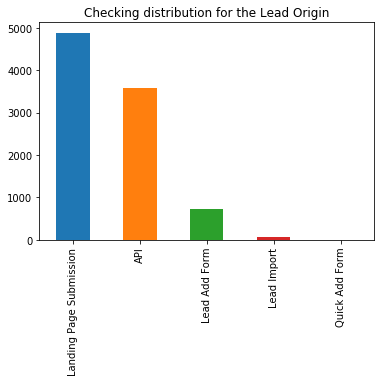

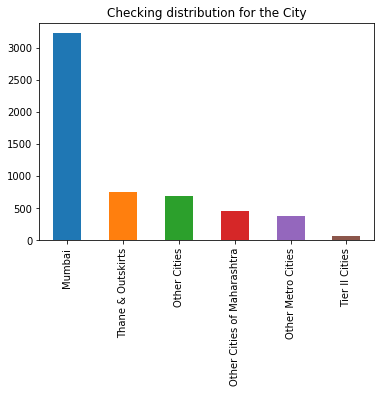

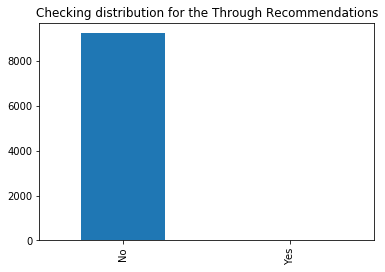

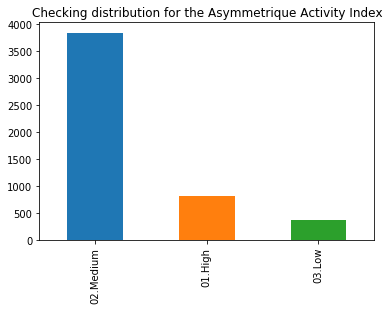

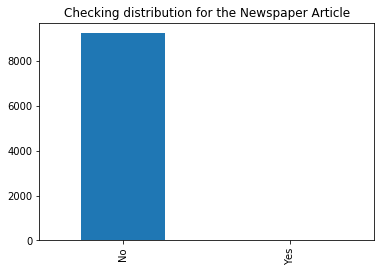

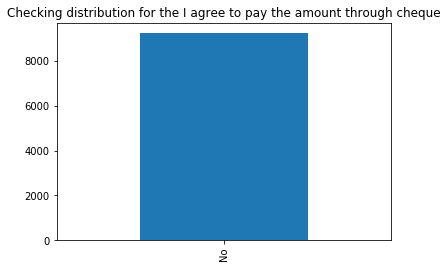

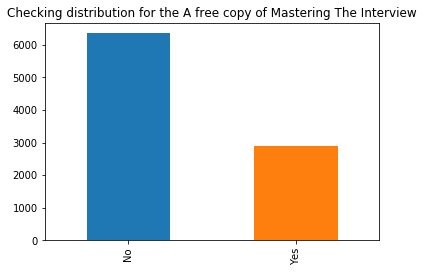

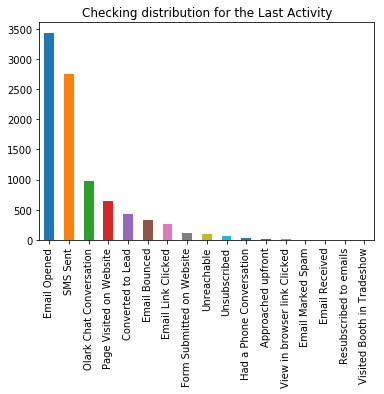

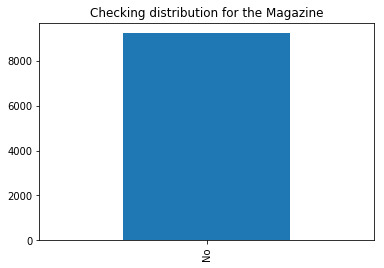

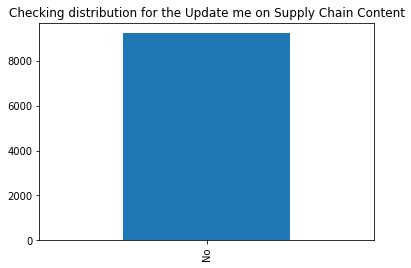

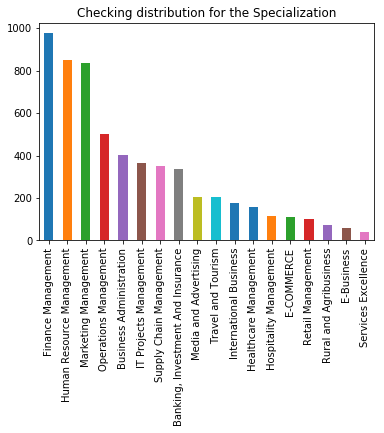

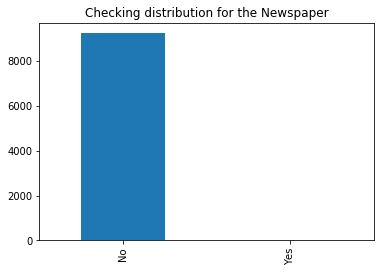

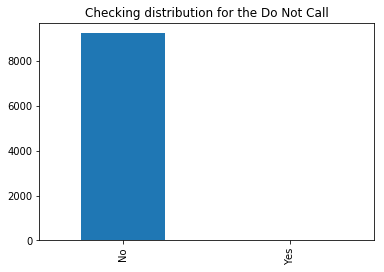

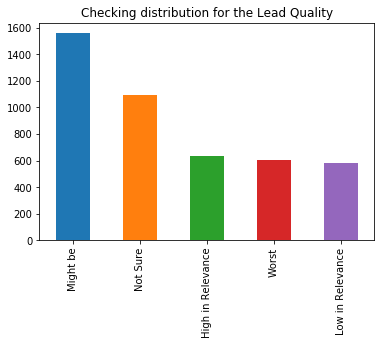

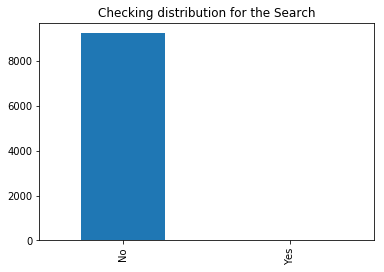

In [15]:
#Checking value counts visually
for col in C:
    plt.title("Checking distribution for the "+ col)
    df[col].value_counts().plot.bar()
    plt.show();

## Removing columns in accordance with the above analysis

##### Search,Magazine, Update me on Supply Chain Content, Get updates on DM Content, Newspaper, What matters most to you in choosing a course, I agree to pay the amount through cheque, Do Not Call,X Education Forums, Newspaper Article, Receive More Updates About Our Courses, Digital Advertisement, Through Recommendations
<br>
These columns are skewed , it contains only a single type of values and will not be useful while doing further analysis

##### How did you hear about X Education,Lead Profile, Asymmetrique Activity Index,Asymmetrique Profile Index, Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
<br>
These columns have high percentage of missing values >50%. Last Notable activity is being dropped as it serves as a duplicate column for last acitivity column


In [16]:
toBeRemovedFromDF=['Search','Magazine', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Newspaper', 
                   'What matters most to you in choosing a course', 'I agree to pay the amount through cheque', 
                   'Do Not Call','X Education Forums', 'Newspaper Article', 'Receive More Updates About Our Courses', 
                   'Digital Advertisement', 'Through Recommendations','How did you hear about X Education','Lead Profile', 'Asymmetrique Activity Index'
                   ,'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score','Last Notable Activity']

C=[ele for ele in C if ele not in toBeRemovedFromDF]
C


['Country',
 'Do Not Email',
 'Tags',
 'Lead Source',
 'Converted',
 'What is your current occupation',
 'Lead Origin',
 'City',
 'A free copy of Mastering The Interview',
 'Last Activity',
 'Specialization',
 'Lead Quality']

In [17]:
# columns left
len(C)

12

#### Nine columns removed successfuly from the list

#### If we look at the bar graph of Lead Origin column they may be classified into 3 categories i.e Landing Page Submission,API,Others. Apart from Landing Page Submission and API all other are negligible when compared with them

In [18]:
# Processing categorical columns as per business logic and decisions
df['Lead Origin']=df['Lead Origin'].apply(lambda x: 'Others' if x not in ['Landing Page Submission','API'] else x)

In [19]:
# Might be             1560
#Not Sure             1092
#High in Relevance     637
#Worst                 601
#Low in Relevance      583
def leadqualityconvert(x):
    if x == 'High in Relevance':
        return 'High'
    elif x =='Low in Relevance':
        return 'Low'
    else:
        return 'MayBe'
df['Lead Quality']=df['Lead Quality'].apply(leadqualityconvert)

#### Similarly for Lead Source column we are merging the small value counts categories into Others

#### We are also imputing the missing values in this column with Others as we are not aware of the source of those leads.

In [20]:
L=['Reference','Welingak Website','Referral Sites','Facebook','bing','google','Click2call','Social Media','Live Chat','Press_Release','youtubechannel','welearnblog_Home','blog','NC_EDM','testone','Pay per Click Ads','WeLearn','blog','NC_EDM',
'testone']


In [21]:
df['Lead Source']=df['Lead Source'].apply(lambda x: 'Others' if x in L else x)
df['Lead Source'].fillna('Others',inplace=True)

#### Similarly for Last activity column we are merging the small value counts categories into Others

In [22]:
df['Last Activity']=df['Last Activity'].apply(lambda x: 'Others' if x not in ['Email Opened', 'SMS Sent'] else x)

#### If we look at the country column, most of leads belong to India, hence we have classified the countries into two categories India and Others

In [23]:
df['Country']=df['Country'].apply(lambda x: 'Others' if x not in ['India'] else x)

#### Since specialization column has 37%missing value which means the customers who have not disclosed their specialization, hence we are assigning there Specialization values as Unknown

In [24]:
df['Specialization'].fillna('Unknown', inplace =True)

#### If we look at the column 'What is your current occupation' we can see majority of the leads are Unemployed

In [25]:
df['What is your current occupation'].fillna('Unknown',inplace=True)

In [26]:
df['What is your current occupation']= df['What is your current occupation'].apply(lambda x: 'Working' if x not in ['Unemployed','Unknown'] else x)

#### Most of the values are associated with Maharashtra e.g Mumbai, Thane & Outskirts, Other Cities of Maharashtra. We converted this column into leads from City in Maharashtra and Others for simplicity without removing the essence of data.

In [27]:
df.City=df.City.apply(lambda x: 'City in Maharashtra' if x in ['Mumbai','Thane & Outskirts','Other Cities of Maharashtra'] else x)

In [28]:
df.City=df.City.apply(lambda x: 'Others' if x not in ['City in Maharashtra'] else x)

#### The values of this column is found to be unstructured. So we convert the data into Potential, Out and Unknown based on the lead being a potential lead, the lead who is lost and whose status is still unknown.

In [29]:
L=['Will revert after reading the email','Ringing','Interested in other courses','switched off','Busy',
   'Interested  in full time MBA','Graduation in progress','in touch with EINS',
   'Want to take admission but has financial problems','In confusion whether part time or DLP',
   'Interested in Next batch','Lateral student','Shall take in the next coming month']
L1=['Already a student','Closed by Horizzon','Lost to EINS','Not doing further education','invalid number',
    'Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','Lost to Others',
    'University not recognized','Recognition issue (DEC approval)']
def convert_tags(x):
    if x in L:
        return 'Potential'
    elif x in L1:
        return 'Out'
    else:
        return 'Unknown'
df['Tags']=df['Tags'].apply(convert_tags)


#### Missing values handled in all categorical columns

In [30]:
# Dropping Id columns as they are not significant for analysis
df.drop(toBeRemovedFromDF + ['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [31]:
df.isna().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                               0
Country                                     0
Specialization                              0
What is your current occupation             0
Tags                                        0
Lead Quality                                0
City                                        0
A free copy of Mastering The Interview      0
dtype: int64

#### Since the missing value percentage for numerical columns is 0.39%, hence we are dropping such missing records

In [32]:
num_cols=list(df.describe().columns)

In [33]:
df[num_cols].isna().sum()

TotalVisits                    137
Total Time Spent on Website      0
Page Views Per Visit           137
dtype: int64

In [34]:
df =df[~df.TotalVisits.isna()]

In [35]:
df[num_cols].isna().sum()

TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
dtype: int64

# Bivariate Analysis

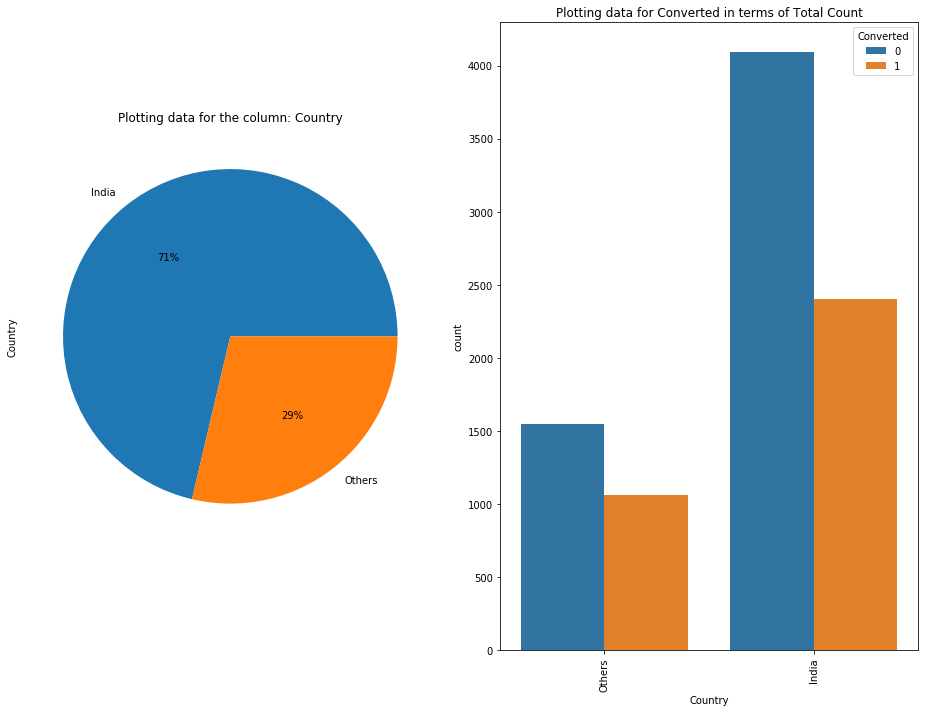

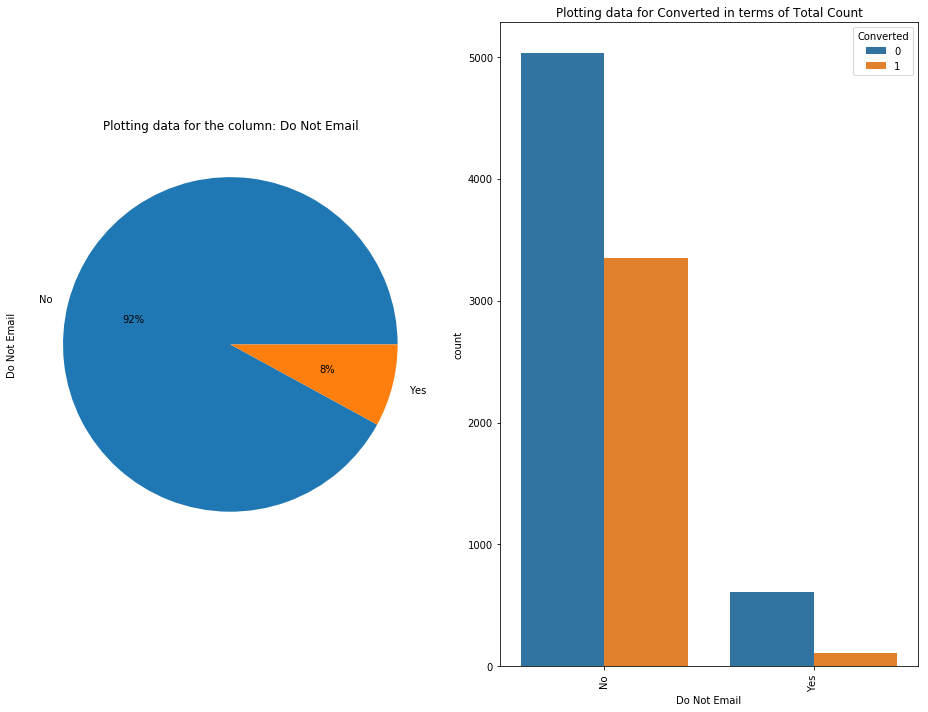

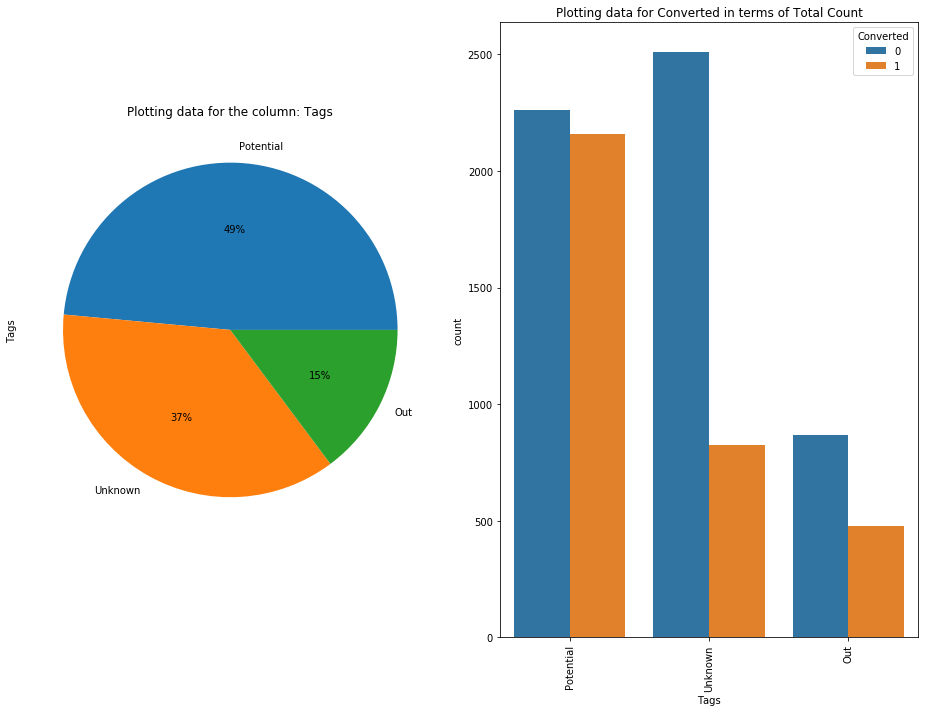

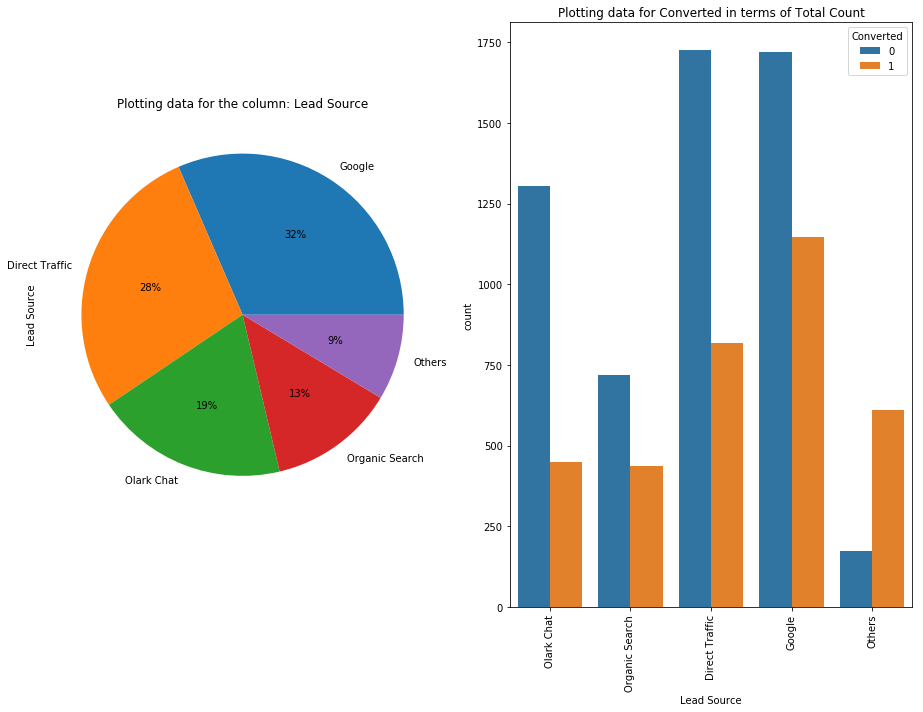

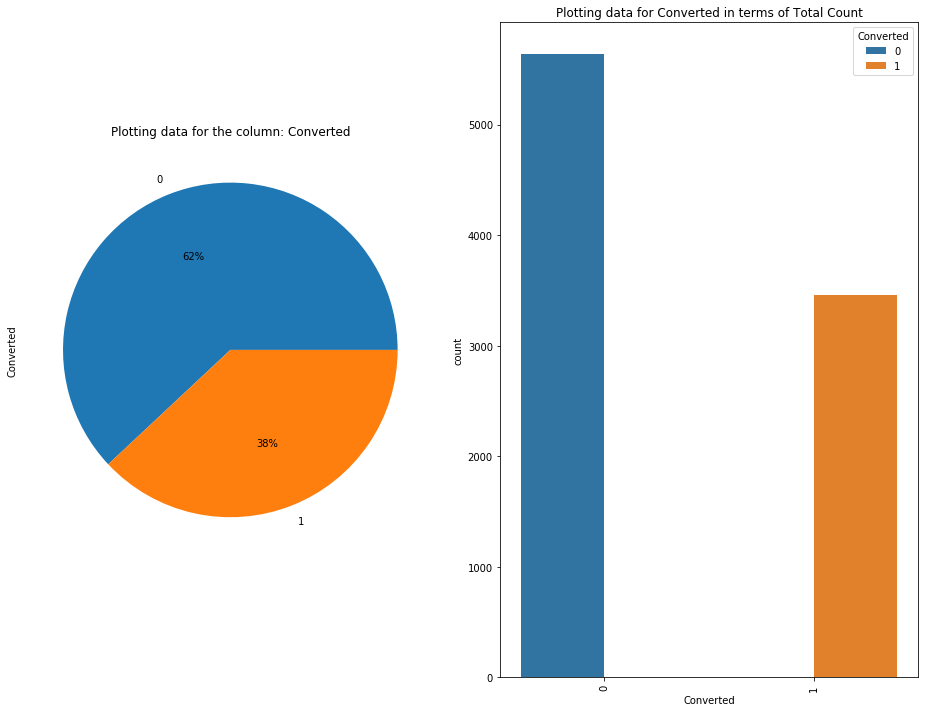

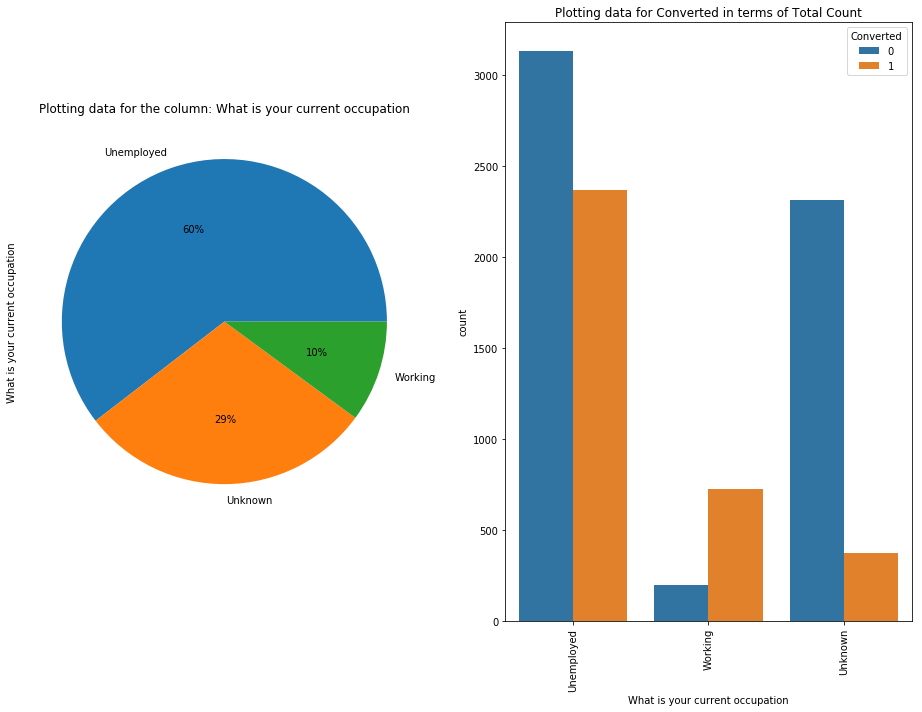

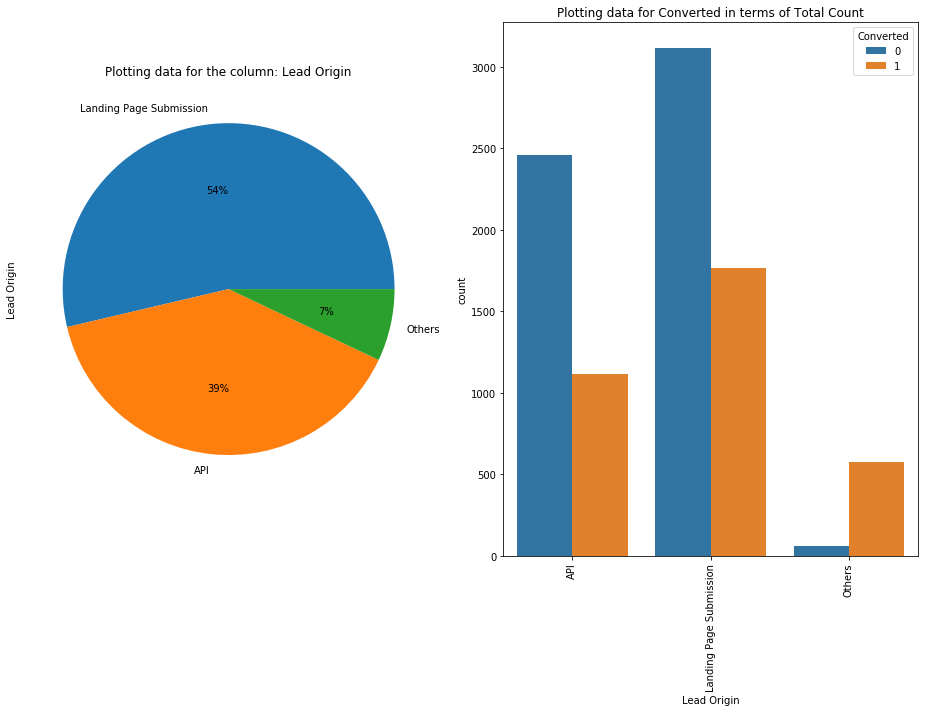

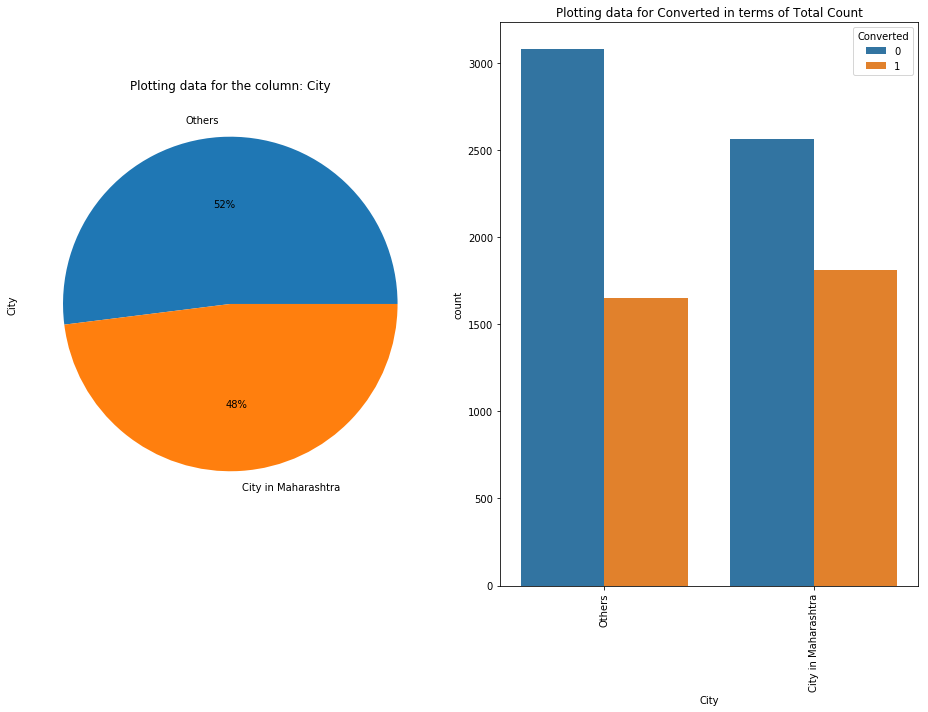

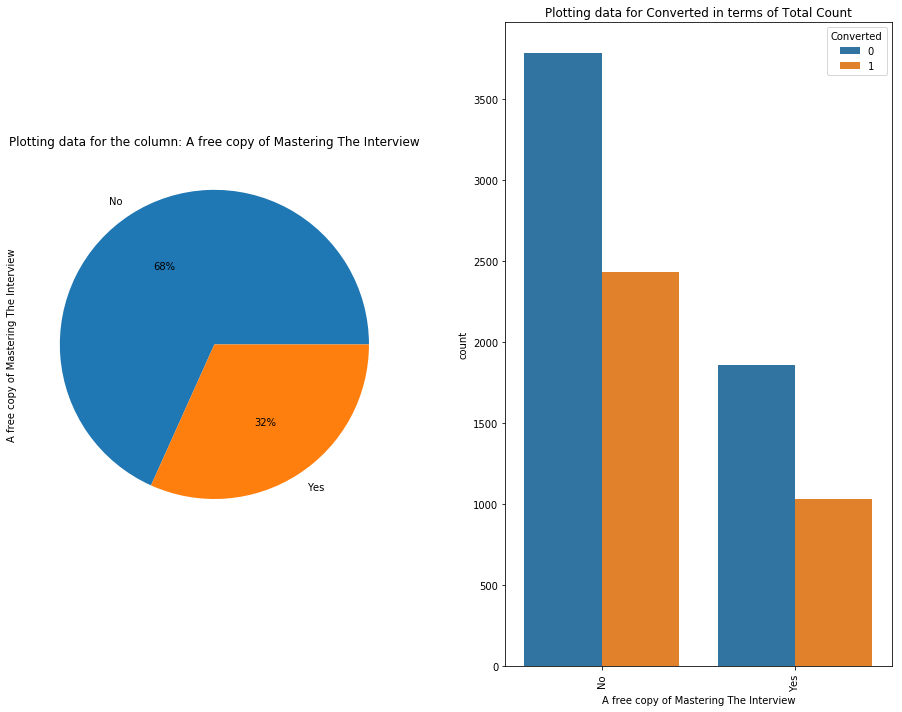

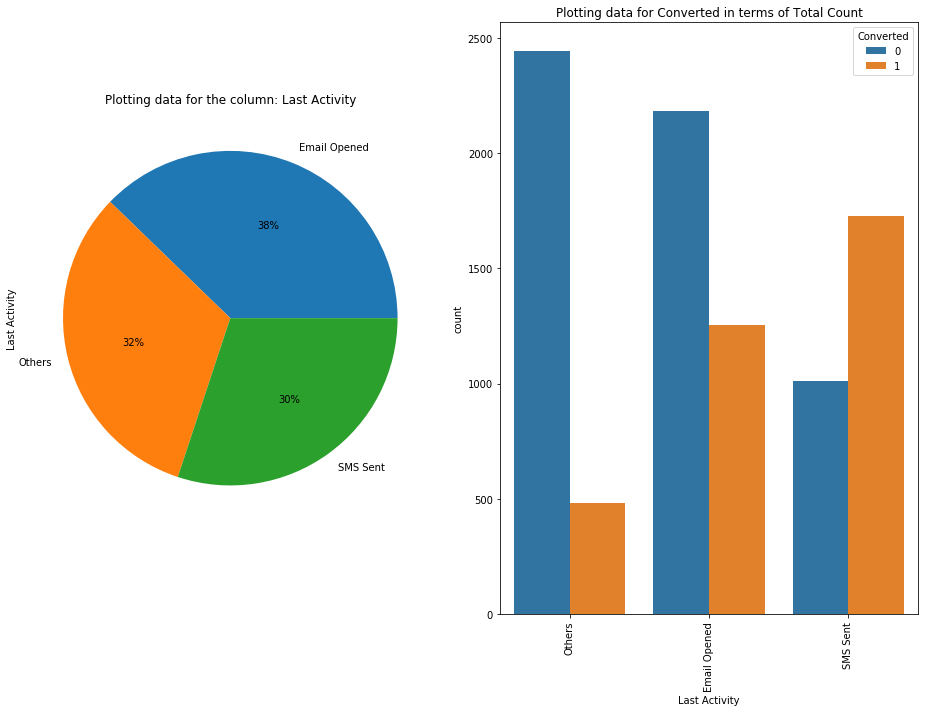

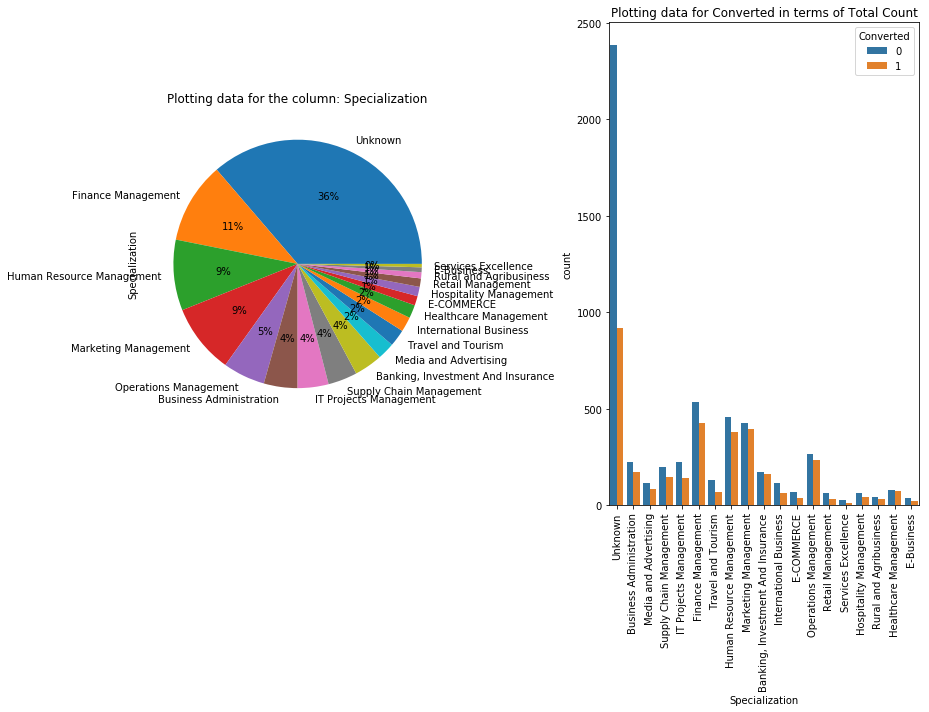

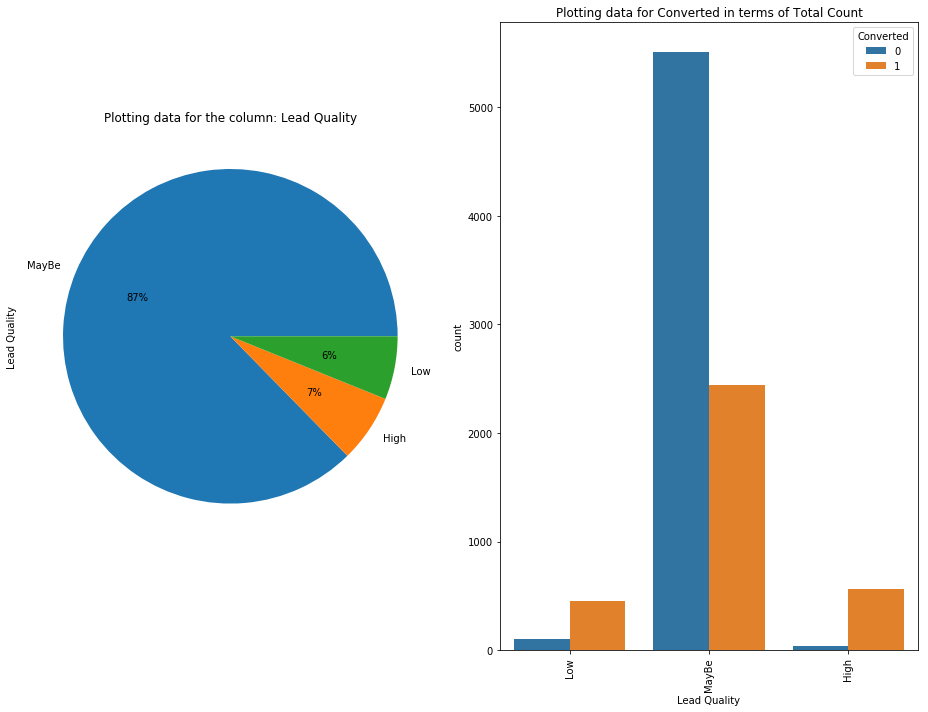

In [36]:
for col in C:
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(121)
    df[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ col)
    
    ax2 = plt.subplot(122)
    sns.countplot(x= col, hue = 'Converted', data = df, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Converted in terms of Total Count')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show();

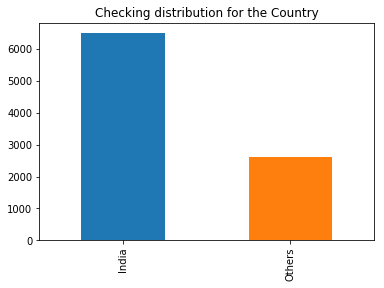

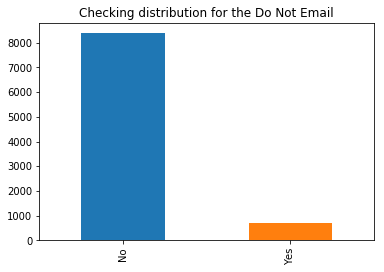

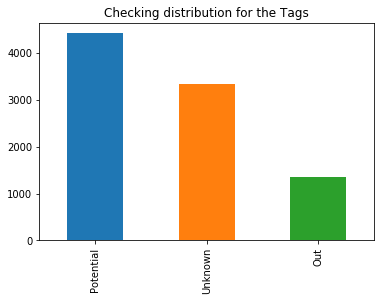

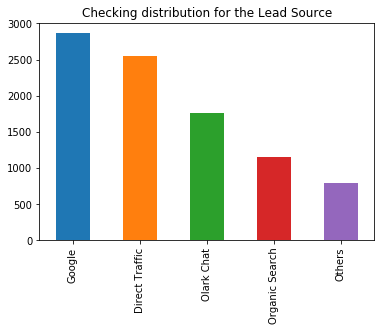

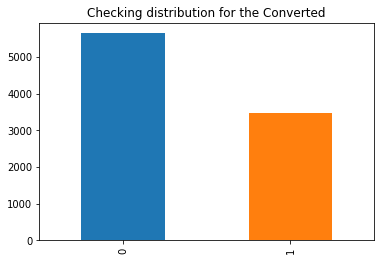

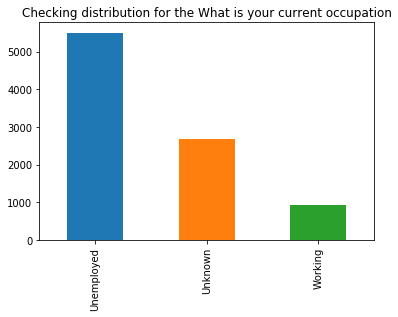

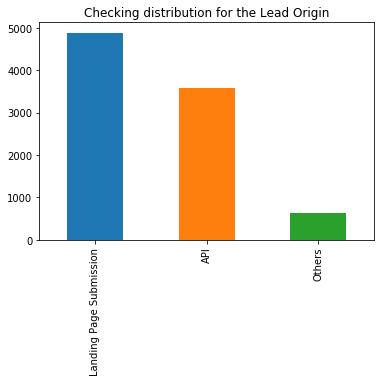

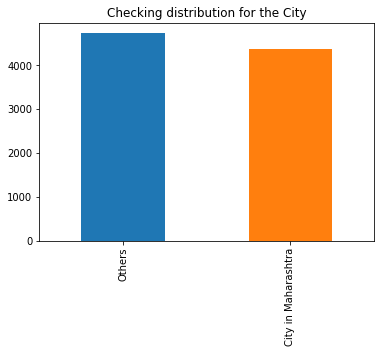

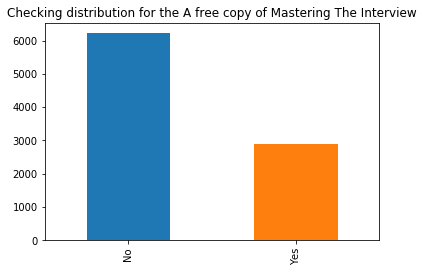

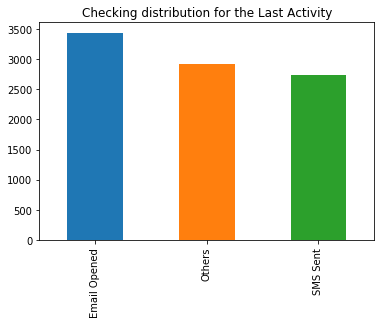

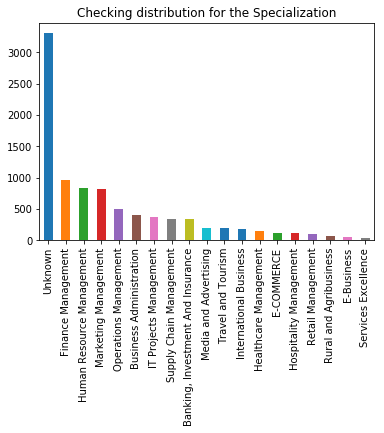

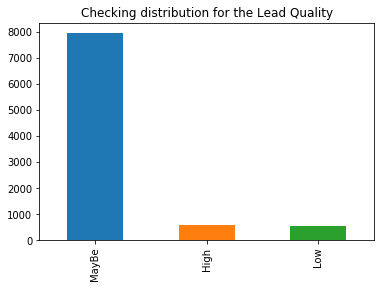

In [37]:
#Checking value counts visually
for col in C:
    plt.title("Checking distribution for the "+col)
    df[col].value_counts().plot.bar()
    plt.show();

# Handling Outliers

In [38]:
# checking the different percentiles for numerical columns
df.describe([0,0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
99%,17.000000,1838.960000,9.000000


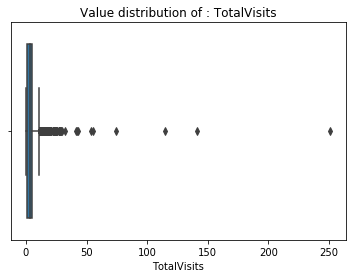

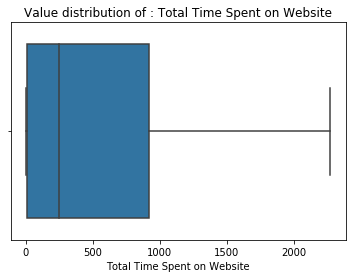

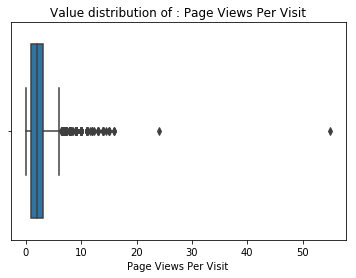

In [39]:
# plotiing boxplot for checking outliers
for col in num_cols:
    plt.title('Value distribution of : ' + col )
    sns.boxplot(df[col])
    plt.show();


#### From the above analysis and boxplot we can see there is huge difference in 99 percentile and maximum values for the column Total Visits, hence we are applying Soft capping in this case. 

In [40]:
# removing outliers
df = df[df['TotalVisits']<=17]

Distribution for- TotalVisits


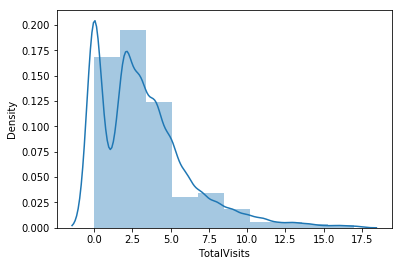

Distribution for- Total Time Spent on Website


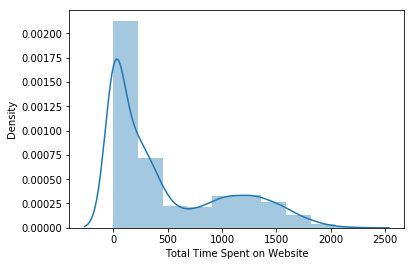

Distribution for- Page Views Per Visit


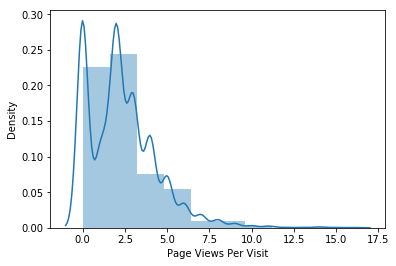

In [41]:
# plotiing boxplot
for col in num_cols:
    print("Distribution for-",col)
    sns.distplot(df[col],bins=10)
    plt.show()


In [42]:
df.shape

(9020, 15)

# Label Encoding for Categorical variables

#### For analytical purposes we are converting categorical variables to dummy using the below operations

In [43]:
# Categorical columns
C = list(set(df.columns)-set(df.describe().columns))
C.remove('A free copy of Mastering The Interview')
C.remove('Do Not Email')
C.remove('Converted')
C

['Last Activity',
 'What is your current occupation',
 'Specialization',
 'Country',
 'Lead Quality',
 'Lead Origin',
 'Tags',
 'City',
 'Lead Source']

In [44]:
# Since the values in these columns are binary, hence we are mapping them 
varlist =  ['A free copy of Mastering The Interview', 'Do Not Email',]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [45]:
# for remaining categorical columns we are applying dummy variables to them and adding them in our data
for col in C:
    dummy = pd.get_dummies(df[col], drop_first=True,prefix=str(col))
    df.drop(col,inplace=True,axis=1)
    #Adding the results to the master dataframe
    df = pd.concat([df,dummy], axis=1)
    

In [46]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Activity_Others,Last Activity_SMS Sent,What is your current occupation_Unknown,What is your current occupation_Working,...,Lead Quality_MayBe,Lead Origin_Landing Page Submission,Lead Origin_Others,Tags_Potential,Tags_Unknown,City_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others
0,0,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,0,1,...,1,1,0,1,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,1,1,0,1,0,0,1,0,0,0


# Test - Train Split

In [47]:
# target variable
Y = df['Converted']

X = df
X.drop('Converted',inplace=True,axis=1)
X.shape

(9020, 39)

In [48]:
# converting target variable into integer
Y = Y.astype('int')

#### We are spliting our dataset into test and train part

#### Train - 70% and Test - 30% .

In [49]:
# spliting test and train
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

#### Since the numerical variables in our data can be in different scales, hence to normalize all variables we are using Standard Scaler

In [50]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

C:\Users\sr23137\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sr23137\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Activity_Others,Last Activity_SMS Sent,What is your current occupation_Unknown,What is your current occupation_Working,Specialization_Business Administration,...,Lead Quality_MayBe,Lead Origin_Landing Page Submission,Lead Origin_Others,Tags_Potential,Tags_Unknown,City_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others
2873,0,0.271781,0.031598,0.814423,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
6823,0,1.276480,2.389158,2.274024,1,0,1,0,0,0,...,1,1,0,1,0,0,0,0,1,0
7258,0,-1.067817,-0.874028,-1.131710,0,1,0,1,0,0,...,1,0,0,0,1,1,0,1,0,0
8327,0,1.611379,1.982176,0.167334,1,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
5940,1,-0.732918,-0.701703,-0.645177,1,1,0,1,0,0,...,1,1,0,0,1,0,0,0,0,0


# Correlations

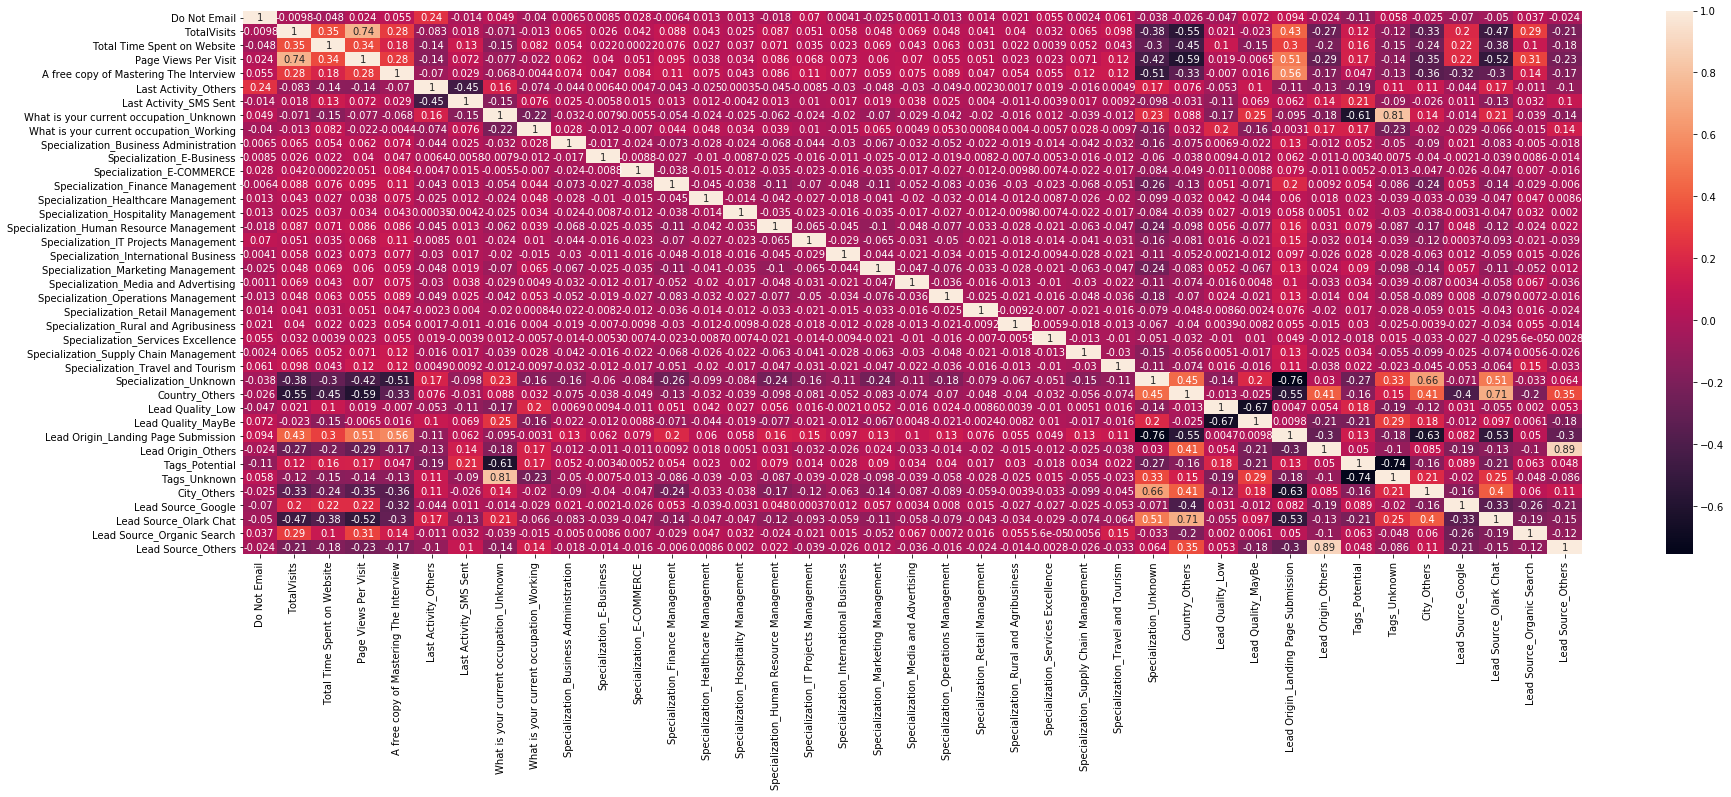

In [51]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

#### Taking a look at the top 10 correlations

In [52]:
correlation_1 = df.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind='quicksort',ascending=False)
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[ correlation_1 != 1.0 ]
correlation_1.head(10)

Lead Source_Others                       Lead Origin_Others                         0.890845
Lead Origin_Others                       Lead Source_Others                         0.890845
Tags_Unknown                             What is your current occupation_Unknown    0.809406
What is your current occupation_Unknown  Tags_Unknown                               0.809406
Specialization_Unknown                   Lead Origin_Landing Page Submission        0.756008
Lead Origin_Landing Page Submission      Specialization_Unknown                     0.756008
TotalVisits                              Page Views Per Visit                       0.740436
Page Views Per Visit                     TotalVisits                                0.740436
Tags_Unknown                             Tags_Potential                             0.740273
Tags_Potential                           Tags_Unknown                               0.740273
dtype: float64

#### From the above list we can see that there is high correlation between Lead Origin_Others and Lead Source_Others. Hence it shows high multi collinearity among these variables. Hence we are dropping Lead Origin_Others before modelling

In [53]:
X_train.drop(['Lead Origin_Others'],inplace=True,axis=1)
X_test.drop(['Lead Origin_Others'],inplace=True,axis=1)

# Logistic Regression using RFE


#### Out of the total 39 variables in our data, we are selecting top 25 variables using RFE (  Recursive Feature elimination).

#### RFE gives us the ranking of top variables after taking a look at various parameters like VIF ( Variance Inflation Factor) and P value of each variable

In [54]:
L = ['Do Not Email', 'TotalVisits', 'Total Time Spent on Website']
# making a logistic regression model
logreg = LogisticRegression()
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 14),
 ('Last Activity_Others', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Unknown', True, 1),
 ('What is your current occupation_Working', True, 1),
 ('Specialization_Business Administration', False, 2),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', False, 13),
 ('Specialization_Finance Management', False, 9),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 3),
 ('Specialization_IT Projects Management', False, 11),
 ('Specialization_International Business', True, 1),
 ('Specialization_Marketing Management', False, 6),
 ('Specialization_Media and Advertising', False, 5),
 ('Specialization_Operations Management', True, 1),
 ('Special

In [56]:
col = X_train.columns[rfe.support_]

In [57]:
# list of columns excluded from our model
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Tags_Potential', 'City_Others'],
      dtype='object')

#### RFE often leads to coarsely tuning the model. While for fine tuning we use Statsmodel where we remove variables after judging them on the basis of VIF and p value obtained from the model

#### Using statsmodel we make judgement on the basis of the following

 High VIF, High p - No brainer remove these values
<br />
- High p Low VIF - remove these first
<br />
- Low p High VIF - removes these after the first ones as it may decrease the VIF
<br />
- low p low vif - no need of anything

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

# Accessing the model using StatsModels

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6288
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2343.9
Date:                Mon, 08 Mar 2021   Deviance:                       4687.8
Time:                        22:40:25   Pearson chi2:                 7.47e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.8310      0.265      6.911      0.000       1.312       2.350
Do Not Email                               -1.0397      0.182     -5.728      0.000      -1.395      -0.684
TotalVisits                                 0.2828      0.056      5.091      0.000       0.174       0.392
Total Time Spent on Website                 1.0754      0.044     24.678      0.000       0.990       1.161
Page Views Per Visit                       -0.2863      0.061     -4.725      0.000      -0.405      -0.168
Last Activity_Others                       -0.7329      0.102     -7.208      0.000      -0.932      -0.534
Last Activity_SMS Sent                      1.6368      0.088     18.574      0.000       1.464       1.809
What is your current occupation_Unknown    -1.9882      0.137    -14.469      0.000      -2.257      -1.719
What is your current occupation_Working     1.4644      0.135     10.832      0.000       1.199       1.729
Specialization_E-Business                   0.2797      0.449      0.623      0.533      -0.600       1.159
Specialization_Healthcare Management        0.2457      0.279      0.881      0.378      -0.301       0.792
Specialization_Hospitality Management      -0.7864      0.337     -2.331      0.020      -1.448      -0.125
Specialization_International Business      -0.2989      0.262     -1.140      0.254      -0.813       0.215
Specialization_Operations Management        0.2487      0.164      1.521      0.128      -0.072       0.569
Specialization_Retail Management           -0.3855      0.350     -1.101      0.271      -1.072       0.301
Specialization_Rural and Agribusiness       0.5745      0.389      1.475      0.140      -0.189       1.338
Specialization_Unknown                     -0.7460      0.137     -5.451      0.000      -1.014      -0.478
Country_Others                              0.7656      0.160      4.771      0.000       0.451       1.080
Lead Quality_Low                           -1.1771      0.263     -4.476      0.000      -1.693      -0.662
Lead Quality_MayBe                         -3.2430      0.223    -14.516      0.000      -3.681      -2.805
Lead Origin_Landing Page Submission        -0.5920      0.146     -4.067      0.000      -0.877      -0.307
Tags_Unknown                                1.3472      0.128     10.549      0.000       1.097       1.598
Lead Source_Google                          0.3963      0.104      3.813      0.000       0.193       0.600
Lead Source_Olark Chat                      0.6404      0.200      3.196      0.001       0.248       1.033
Lead Source_Organic Search                  0.3167      0.137      2.310      0.021       0.048       0.585
Lead Source_Others                          1.9669      0.207      9.509      0.000       1.561       2.372
==============================

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Lead Quality_MayBe,10.84
16,Country_Others,5.60
19,Lead Origin_Landing Page Submission,5.33
22,Lead Source_Olark Chat,5.27
20,Tags_Unknown,5.18
15,Specialization_Unknown,4.43
6,What is your current occupation_Unknown,4.42
3,Page Views Per Visit,2.74
1,TotalVisits,2.40
24,Lead Source_Others,2.32


#### Eliminating column Lead Quality_MayBe as it very high VIF and it leads to multi collinearity between variables

In [60]:
col = list(col)
col.remove('Lead Quality_MayBe')
col

['Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity_Others',
 'Last Activity_SMS Sent',
 'What is your current occupation_Unknown',
 'What is your current occupation_Working',
 'Specialization_E-Business',
 'Specialization_Healthcare Management',
 'Specialization_Hospitality Management',
 'Specialization_International Business',
 'Specialization_Operations Management',
 'Specialization_Retail Management',
 'Specialization_Rural and Agribusiness',
 'Specialization_Unknown',
 'Country_Others',
 'Lead Quality_Low',
 'Lead Origin_Landing Page Submission',
 'Tags_Unknown',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Others']

In [61]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm3.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6289
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2519.1
Date:                Mon, 08 Mar 2021   Deviance:                       5038.1
Time:                        22:40:25   Pearson chi2:                 7.14e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8088      0.162     -4.984      0.000      -1.127      -0.491
Do Not Email                               -1.0537      0.176     -5.986      0.000      -1.399      -0.709
TotalVisits                                 0.3004      0.053      5.714      0.000       0.197       0.403
Total Time Spent on Website                 1.0894      0.042     25.953      0.000       1.007       1.172
Page Views Per Visit                       -0.3148      0.057     -5.481      0.000      -0.427      -0.202
Last Activity_Others                       -0.8165      0.096     -8.507      0.000      -1.005      -0.628
Last Activity_SMS Sent                      1.4420      0.084     17.217      0.000       1.278       1.606
What is your current occupation_Unknown    -2.0060      0.137    -14.688      0.000      -2.274      -1.738
What is your current occupation_Working     1.3054      0.133      9.850      0.000       1.046       1.565
Specialization_E-Business                   0.4189      0.420      0.998      0.318      -0.404       1.241
Specialization_Healthcare Management        0.2733      0.272      1.005      0.315      -0.260       0.806
Specialization_Hospitality Management      -0.8682      0.325     -2.671      0.008      -1.505      -0.231
Specialization_International Business      -0.1674      0.243     -0.690      0.490      -0.643       0.308
Specialization_Operations Management        0.1731      0.156      1.108      0.268      -0.133       0.479
Specialization_Retail Management           -0.2429      0.326     -0.744      0.457      -0.883       0.397
Specialization_Rural and Agribusiness       0.4280      0.377      1.136      0.256      -0.311       1.167
Specialization_Unknown                     -1.1112      0.129     -8.633      0.000      -1.363      -0.859
Country_Others                              0.8976      0.152      5.888      0.000       0.599       1.196
Lead Quality_Low                            1.6764      0.161     10.415      0.000       1.361       1.992
Lead Origin_Landing Page Submission        -0.8110      0.138     -5.894      0.000      -1.081      -0.541
Tags_Unknown                                1.0901      0.126      8.671      0.000       0.844       1.337
Lead Source_Google                          0.4317      0.099      4.362      0.000       0.238       0.626
Lead Source_Olark Chat                      0.5682      0.191      2.970      0.003       0.193       0.943
Lead Source_Organic Search                  0.3401      0.131      2.602      0.009       0.084       0.596
Lead Source_Others                          2.1810      0.198     11.018      0.000       1.793       2.569
===========================================================================================================
"""

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Country_Others,5.59
19,Tags_Unknown,5.12
21,Lead Source_Olark Chat,4.96
6,What is your current occupation_Unknown,4.42
15,Specialization_Unknown,3.29
3,Page Views Per Visit,2.74
18,Lead Origin_Landing Page Submission,2.61
1,TotalVisits,2.40
23,Lead Source_Others,2.21
4,Last Activity_Others,2.01


#### Eliminating column Country_Others as it has very high VIF leading to multi collinearity

In [63]:
col.remove('Country_Others')

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm5.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6290
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2536.1
Date:                Mon, 08 Mar 2021   Deviance:                       5072.1
Time:                        22:40:27   Pearson chi2:                 7.10e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.7392      0.161     -4.598      0.000      -1.054      -0.424
Do Not Email                               -1.0165      0.174     -5.829      0.000      -1.358      -0.675
TotalVisits                                 0.2753      0.052      5.249      0.000       0.173       0.378
Total Time Spent on Website                 1.0624      0.042     25.572      0.000       0.981       1.144
Page Views Per Visit                       -0.3517      0.057     -6.162      0.000      -0.464      -0.240
Last Activity_Others                       -0.8357      0.096     -8.724      0.000      -1.023      -0.648
Last Activity_SMS Sent                      1.4387      0.083     17.276      0.000       1.276       1.602
What is your current occupation_Unknown    -2.0285      0.136    -14.907      0.000      -2.295      -1.762
What is your current occupation_Working     1.3131      0.132      9.977      0.000       1.055       1.571
Specialization_E-Business                   0.4040      0.416      0.971      0.331      -0.411       1.219
Specialization_Healthcare Management        0.2750      0.272      1.010      0.312      -0.259       0.809
Specialization_Hospitality Management      -0.8377      0.323     -2.594      0.009      -1.471      -0.205
Specialization_International Business      -0.1339      0.241     -0.556      0.578      -0.606       0.338
Specialization_Operations Management        0.1867      0.156      1.198      0.231      -0.119       0.492
Specialization_Retail Management           -0.1935      0.322     -0.601      0.548      -0.824       0.437
Specialization_Rural and Agribusiness       0.3650      0.375      0.973      0.331      -0.370       1.100
Specialization_Unknown                     -1.0591      0.127     -8.336      0.000      -1.308      -0.810
Lead Quality_Low                            1.6842      0.160     10.520      0.000       1.370       1.998
Lead Origin_Landing Page Submission        -0.7808      0.137     -5.709      0.000      -1.049      -0.513
Tags_Unknown                                1.0902      0.125      8.711      0.000       0.845       1.336
Lead Source_Google                          0.3830      0.098      3.900      0.000       0.190       0.575
Lead Source_Olark Chat                      1.2295      0.158      7.791      0.000       0.920       1.539
Lead Source_Organic Search                  0.3529      0.130      2.711      0.007       0.098       0.608
Lead Source_Others                          2.7039      0.176     15.380      0.000       2.359       3.048
===========================================================================================================
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Tags_Unknown,5.12
6,What is your current occupation_Unknown,4.42
15,Specialization_Unknown,3.24
3,Page Views Per Visit,2.71
20,Lead Source_Olark Chat,2.63
17,Lead Origin_Landing Page Submission,2.55
1,TotalVisits,2.38
4,Last Activity_Others,2.01
19,Lead Source_Google,1.92
5,Last Activity_SMS Sent,1.82


#### Eliminating Tags_Unknown as it has very high VIF leading to multi collinearity among variables

In [66]:
col.remove('Tags_Unknown')

In [67]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = logm6.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6291
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.6
Date:                Mon, 08 Mar 2021   Deviance:                       5151.2
Time:                        22:40:28   Pearson chi2:                 6.67e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.6839      0.160     -4.279      0.000      -0.997      -0.371
Do Not Email                               -0.9617      0.172     -5.580      0.000      -1.299      -0.624
TotalVisits                                 0.2817      0.052      5.433      0.000       0.180       0.383
Total Time Spent on Website                 1.0687      0.041     25.871      0.000       0.988       1.150
Page Views Per Visit                       -0.3624      0.057     -6.405      0.000      -0.473      -0.251
Last Activity_Others                       -0.8829      0.095     -9.304      0.000      -1.069      -0.697
Last Activity_SMS Sent                      1.4327      0.082     17.389      0.000       1.271       1.594
What is your current occupation_Unknown    -1.1539      0.090    -12.860      0.000      -1.330      -0.978
What is your current occupation_Working     1.2419      0.131      9.456      0.000       0.985       1.499
Specialization_E-Business                   0.4806      0.414      1.161      0.246      -0.331       1.292
Specialization_Healthcare Management        0.2602      0.272      0.957      0.339      -0.273       0.793
Specialization_Hospitality Management      -0.8002      0.321     -2.493      0.013      -1.429      -0.171
Specialization_International Business      -0.1080      0.242     -0.447      0.655      -0.582       0.366
Specialization_Operations Management        0.2086      0.155      1.348      0.178      -0.095       0.512
Specialization_Retail Management           -0.1933      0.322     -0.601      0.548      -0.824       0.437
Specialization_Rural and Agribusiness       0.3370      0.375      0.898      0.369      -0.399       1.073
Specialization_Unknown                     -0.8579      0.125     -6.883      0.000      -1.102      -0.614
Lead Quality_Low                            1.5870      0.159      9.957      0.000       1.275       1.899
Lead Origin_Landing Page Submission        -0.7554      0.136     -5.547      0.000      -1.022      -0.488
Lead Source_Google                          0.4042      0.098      4.127      0.000       0.212       0.596
Lead Source_Olark Chat                      1.3023      0.156      8.351      0.000       0.997       1.608
Lead Source_Organic Search                  0.3507      0.130      2.707      0.007       0.097       0.605
Lead Source_Others                          2.7508      0.174     15.854      0.000       2.411       3.091
===========================================================================================================
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Specialization_Unknown,3.06
3,Page Views Per Visit,2.71
19,Lead Source_Olark Chat,2.62
17,Lead Origin_Landing Page Submission,2.53
1,TotalVisits,2.38
4,Last Activity_Others,2.00
18,Lead Source_Google,1.92
5,Last Activity_SMS Sent,1.82
6,What is your current occupation_Unknown,1.64
20,Lead Source_Organic Search,1.53


#### Eliminating Specialization_International Business as it has high P value

In [69]:
col.remove('Specialization_International Business')

In [70]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res5 = logm7.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6292
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.7
Date:                Mon, 08 Mar 2021   Deviance:                       5151.4
Time:                        22:40:28   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.6878      0.160     -4.310      0.000      -1.001      -0.375
Do Not Email                               -0.9627      0.172     -5.585      0.000      -1.301      -0.625
TotalVisits                                 0.2819      0.052      5.437      0.000       0.180       0.384
Total Time Spent on Website                 1.0689      0.041     25.878      0.000       0.988       1.150
Page Views Per Visit                       -0.3631      0.057     -6.420      0.000      -0.474      -0.252
Last Activity_Others                       -0.8825      0.095     -9.301      0.000      -1.068      -0.697
Last Activity_SMS Sent                      1.4322      0.082     17.385      0.000       1.271       1.594
What is your current occupation_Unknown    -1.1540      0.090    -12.862      0.000      -1.330      -0.978
What is your current occupation_Working     1.2427      0.131      9.466      0.000       0.985       1.500
Specialization_E-Business                   0.4851      0.414      1.172      0.241      -0.326       1.296
Specialization_Healthcare Management        0.2647      0.272      0.974      0.330      -0.268       0.797
Specialization_Hospitality Management      -0.7959      0.321     -2.481      0.013      -1.425      -0.167
Specialization_Operations Management        0.2129      0.154      1.379      0.168      -0.090       0.516
Specialization_Retail Management           -0.1889      0.322     -0.587      0.557      -0.819       0.441
Specialization_Rural and Agribusiness       0.3413      0.375      0.909      0.363      -0.394       1.077
Specialization_Unknown                     -0.8540      0.124     -6.869      0.000      -1.098      -0.610
Lead Quality_Low                            1.5866      0.159      9.955      0.000       1.274       1.899
Lead Origin_Landing Page Submission        -0.7556      0.136     -5.550      0.000      -1.023      -0.489
Lead Source_Google                          0.4040      0.098      4.125      0.000       0.212       0.596
Lead Source_Olark Chat                      1.3022      0.156      8.350      0.000       0.997       1.608
Lead Source_Organic Search                  0.3508      0.130      2.709      0.007       0.097       0.605
Lead Source_Others                          2.7513      0.173     15.859      0.000       2.411       3.091
===========================================================================================================
"""

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Specialization_Unknown,3.06
3,Page Views Per Visit,2.71
18,Lead Source_Olark Chat,2.62
16,Lead Origin_Landing Page Submission,2.50
1,TotalVisits,2.38
4,Last Activity_Others,2.00
17,Lead Source_Google,1.91
5,Last Activity_SMS Sent,1.82
6,What is your current occupation_Unknown,1.64
19,Lead Source_Organic Search,1.53


#### Eliminating Specialization_Retail Management as it has high P value

In [72]:
col.remove('Specialization_Retail Management')

In [73]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res6 = logm8.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.9
Date:                Mon, 08 Mar 2021   Deviance:                       5151.8
Time:                        22:40:29   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.6910      0.159     -4.332      0.000      -1.004      -0.378
Do Not Email                               -0.9652      0.172     -5.601      0.000      -1.303      -0.627
TotalVisits                                 0.2819      0.052      5.438      0.000       0.180       0.384
Total Time Spent on Website                 1.0682      0.041     25.880      0.000       0.987       1.149
Page Views Per Visit                       -0.3628      0.057     -6.418      0.000      -0.474      -0.252
Last Activity_Others                       -0.8833      0.095     -9.310      0.000      -1.069      -0.697
Last Activity_SMS Sent                      1.4324      0.082     17.388      0.000       1.271       1.594
What is your current occupation_Unknown    -1.1533      0.090    -12.858      0.000      -1.329      -0.978
What is your current occupation_Working     1.2433      0.131      9.468      0.000       0.986       1.501
Specialization_E-Business                   0.4895      0.414      1.183      0.237      -0.322       1.301
Specialization_Healthcare Management        0.2691      0.272      0.990      0.322      -0.263       0.802
Specialization_Hospitality Management      -0.7914      0.321     -2.468      0.014      -1.420      -0.163
Specialization_Operations Management        0.2173      0.154      1.408      0.159      -0.085       0.520
Specialization_Rural and Agribusiness       0.3460      0.375      0.922      0.356      -0.389       1.081
Specialization_Unknown                     -0.8501      0.124     -6.846      0.000      -1.094      -0.607
Lead Quality_Low                            1.5890      0.159      9.972      0.000       1.277       1.901
Lead Origin_Landing Page Submission        -0.7563      0.136     -5.553      0.000      -1.023      -0.489
Lead Source_Google                          0.4036      0.098      4.121      0.000       0.212       0.596
Lead Source_Olark Chat                      1.3013      0.156      8.346      0.000       0.996       1.607
Lead Source_Organic Search                  0.3490      0.129      2.695      0.007       0.095       0.603
Lead Source_Others                          2.7507      0.173     15.857      0.000       2.411       3.091
===========================================================================================================
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Specialization_Unknown,3.05
3,Page Views Per Visit,2.71
17,Lead Source_Olark Chat,2.61
15,Lead Origin_Landing Page Submission,2.49
1,TotalVisits,2.38
4,Last Activity_Others,2.00
16,Lead Source_Google,1.91
5,Last Activity_SMS Sent,1.82
6,What is your current occupation_Unknown,1.64
18,Lead Source_Organic Search,1.53


In [75]:
# Getting the predicted values on the train set
y_train_pred = res6.predict(X_train_sm)
y_train_pred[:10]

2873    0.503595
6823    0.918399
7258    0.043086
8327    0.897780
5940    0.005645
5686    0.964008
5372    0.693499
4736    0.229026
5812    0.922653
893     0.479133
dtype: float64

In [76]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ID
2873,1,0.503595,2873
6823,1,0.918399,6823
7258,0,0.043086,7258
8327,1,0.897780,8327
5940,0,0.005645,5940


# Plotting ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [77]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

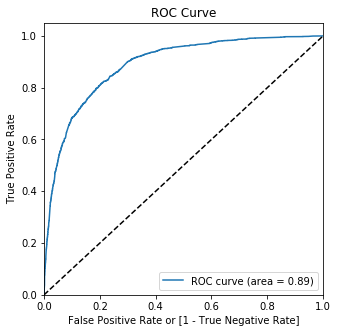

In [79]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Finding optimal cutoff point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [80]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
2873,1,0.503595,2873,1,1,1,1,1,1,0,0,0,0
6823,1,0.918399,6823,1,1,1,1,1,1,1,1,1,1
7258,0,0.043086,7258,1,0,0,0,0,0,0,0,0,0
8327,1,0.897780,8327,1,1,1,1,1,1,1,1,1,0
5940,0,0.005645,5940,1,0,0,0,0,0,0,0,0,0


In [81]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.376465     1.000000     0.000000
0.1          0.1  0.647133     0.966344     0.454407
0.2          0.2  0.755781     0.920909     0.656083
0.3          0.3  0.789832     0.847286     0.755144
0.4          0.4  0.808838     0.779975     0.826264
0.5          0.5  0.815648     0.718553     0.874270
0.6          0.6  0.804403     0.604123     0.925324
0.7          0.7  0.790782     0.530080     0.948184
0.8          0.8  0.759265     0.411864     0.969012
0.9          0.9  0.702566     0.230963     0.987300


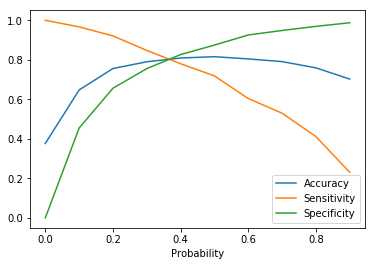

In [82]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [83]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
2873,1,0.503595,2873,1,1,1,1,1,1,0,0,0,0,1
6823,1,0.918399,6823,1,1,1,1,1,1,1,1,1,1,1
7258,0,0.043086,7258,1,0,0,0,0,0,0,0,0,0,0
8327,1,0.897780,8327,1,1,1,1,1,1,1,1,1,0,1
5940,0,0.005645,5940,1,0,0,0,0,0,0,0,0,0,0


#### Accuracy - Train

In [84]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7898321191004117

#### Confusion matrix - Train

In [85]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2973,  964],
       [ 363, 2014]], dtype=int64)

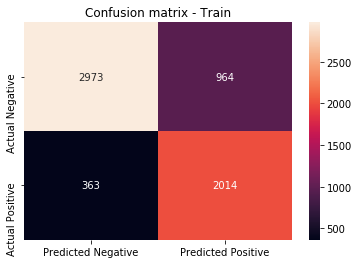

In [86]:
plt.title('Confusion matrix - Train')
df_cm = pd.DataFrame(confusion2, ['Actual Negative','Actual Positive'], ['Predicted Negative','Predicted Positive'])
sns.heatmap(df_cm,annot=True,fmt='g')
plt.show()

#### Precision - Train
TP / TP + FP

In [87]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8472864955826672

#### Recall - Train
TP / TP + FN

In [88]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8472864955826672

# Precision and Recall Trade Off

In [89]:
from sklearn.metrics import precision_recall_curve

In [90]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

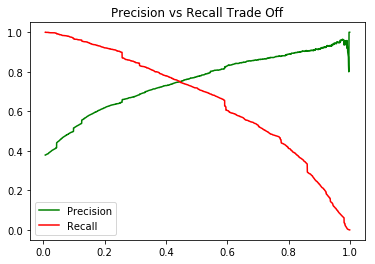

In [91]:
plt.title('Precision vs Recall Trade Off')
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')
plt.legend()
plt.show()

# Making predictions on test

#### Using Standard Scaler to transform the test dataset also

In [92]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

C:\Users\sr23137\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [93]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity_Others,Last Activity_SMS Sent,What is your current occupation_Unknown,What is your current occupation_Working,Specialization_E-Business,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Unknown,Lead Quality_Low,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others
5130,1,-1.067817,-0.874028,-1.131710,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
6929,0,0.606681,-0.820864,1.300957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1484,1,0.271781,-0.644872,0.814423,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0
6519,0,-0.398018,2.024341,-0.158643,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7472,0,-0.398018,1.666857,-0.158643,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Using our final stats model to make predictions on the test dataset

In [94]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res6.predict(X_test_sm)
y_test_pred.head()

5130    0.016862
6929    0.179477
1484    0.219763
6519    0.912766
7472    0.846950
dtype: float64

#### Consolidating the Output results in a dataframe

In [95]:
y_test_df = pd.DataFrame(y_test)
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [96]:
# Seperating Converted or not based on optimal cut off point
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [97]:
y_pred_final.columns = ['Converted','Lead_Score','Final_predicted']

In [98]:
# Final test output with lead scores
y_pred_final.head()

,Converted,Lead_Score,Final_predicted
5130,0,0.016862,0
6929,0,0.179477,0
1484,0,0.219763,0
6519,0,0.912766,1
7472,1,0.846950,1


#### Test accuracy

In [99]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_predicted)

0.7937915742793792

#### Confusion matrix - Test

In [100]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_predicted )
confusion3

array([[1253,  405],
       [ 153,  895]], dtype=int64)

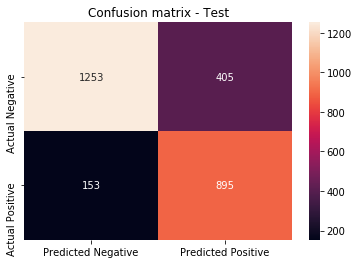

In [101]:
plt.title('Confusion matrix - Test')
df_cm = pd.DataFrame(confusion3, ['Actual Negative','Actual Positive'], ['Predicted Negative','Predicted Positive'])
sns.heatmap(df_cm,annot=True,fmt='g')
plt.show()

In [102]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

#### Recall - Test

In [103]:
# recall
TP/ float(TP+FN)

0.8540076335877863

#### Sensitivity - Test

In [104]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FP)

0.6884615384615385

#### Specificity - Test

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.755729794933655

#### Accuracy Test

In [106]:
# Accuracy test
(TP + TN) / float(TP + TN + FP + FN)

0.7937915742793792

#### Recommendations

Working professionals should be targeted most as they are our hottest leads. 
A user spending more time and visiting more often on website is a potential hot lead. 
All the sources of leads should be considered seriously as the smaller values when clubbed together is creating impact. 
This is re-iterated in other words by the Lead Quality_Low coefficient. 
Olark Chat is one very good lead source with potential candidates. 
The leads that have not disclosed their current occupation were found to have negative impact on the lead score.